#TASK 1 : Obtaining the Cluster Figure

In [1]:
# Load the dataset with the help of pandas
import pandas
data = pandas.read_csv('C:/Users/gurun/Desktop/5/spiral-dataset.csv', header = None,names = ["X_coordinate", "Y_coordinate", "Cluster"],sep=r'\t')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
data

,X_coordinate,Y_coordinate,Cluster
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
5,28.05,5.00,3
6,27.20,4.55,3
7,26.35,4.15,3
8,25.40,3.85,3
9,24.60,3.60,3


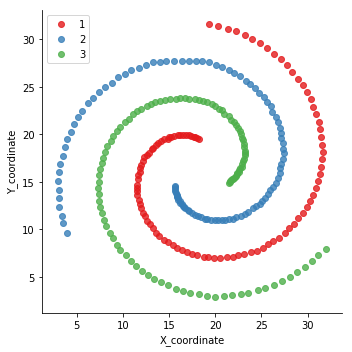

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from copy import deepcopy
sns.lmplot('X_coordinate', 'Y_coordinate', data=data, hue='Cluster',
           fit_reg=False, legend=False, markers=["o","o","o"], palette="Set1")
plt.legend(loc='upper left')
plt.show()

#TASK 2 IMPLEMENTATION OF THE K-MEANS CLUSTERING

In [5]:
# 2.a Randomly initializing three centroids
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')

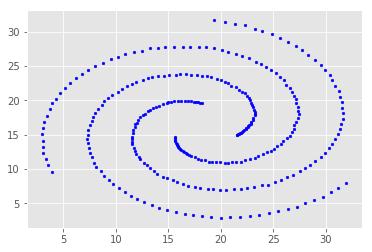

In [6]:
# Getting the values and plotting it
Column_one = data['X_coordinate'].values
Column_two = data['Y_coordinate'].values
Coordinates = np.array(list(zip(Column_one, Column_two)))
plt.scatter(Column_one, Column_two,c='blue', s=7)

In [7]:
Coordinates

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [8]:
k = 3
def dist(first_point, second_point, ax=1):
    return np.linalg.norm(first_point - second_point, axis=ax)
XCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
YCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
Centroid = np.array(list(zip(XCoord_Centroids, YCoord_Centroids)), dtype=np.float32)
print(Centroid)

[[10.  2.]
 [ 6.  8.]
 [ 7. 10.]]


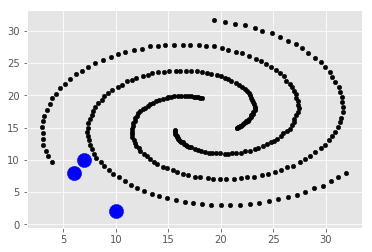

In [9]:
# Plot with the values of the random assigned centroids
plt.scatter(Column_one, Column_two,s=20, c='#030303')
plt.scatter(XCoord_Centroids, YCoord_Centroids,c='b', s=200, marker='o')

In [10]:
#Computing the distance between the converged centroids and the intially assigned centroids
Old_Centroids = np.zeros(Centroid.shape)
clusters = np.zeros(len(Coordinates))
error = dist(Centroid, Old_Centroids, None)

In [11]:
#This loop will run until the error will converge to 0
while error !=0:
    for i in range(len(Coordinates)):
        distances = dist(Coordinates[i], Centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Old_Centroids = deepcopy(Centroid)
    for i in range(k):
        points = [Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i]
        Centroid[i] = np.mean(points, axis=0)
    error = dist(Centroid, Old_Centroids, None)

#Extra Credit Clustering Results

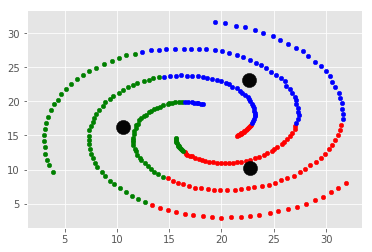

In [12]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, marker='o',c=colors[i])
ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='o', s=200, c='#040404')

In [13]:
# 2.b Computing the Sum of Squared Error and the Rand Index
#Computation of Sum of Squared Error
Sum_of_Squared_Error = 0
import math
for i in range(k):
   point_value = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
   for j in range(len(point_value)):
     val_p= (Centroid[i][0]-point_value[j][0])
     val_q= (Centroid[i][1]-point_value[j][1])
     val_p = math.pow(val_p,2)
     val_q = math.pow(val_q,2)
     final_val = val_q+val_p
     Sum_of_Squared_Error = Sum_of_Squared_Error + final_val
print("Sum_of_Squared_Error_1:",Sum_of_Squared_Error/100)

Sum_of_Squared_Error_1: 123.1390017540288


In [14]:
true_val = data['Cluster'].values

In [15]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [16]:
Rand_Index = rand_score(true_val,clusters)
print("The obtained Rand Index_1 is:",Rand_Index)

The obtained Rand Index_1 is: 0.554044026712837


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


#2_c Run tasks 2.a,2.b for 9 times and report the best SSE and RAND ID obtained.

#RUN 2 of K Means Clustering Algorithm  

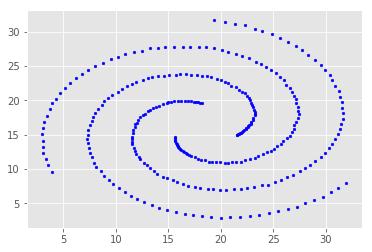

In [17]:
# 2.a Randomly initializing three centroids
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
# Getting the values and plotting it
Column_one = data['X_coordinate'].values
Column_two = data['Y_coordinate'].values
Coordinates = np.array(list(zip(Column_one, Column_two)))
plt.scatter(Column_one, Column_two,c='blue', s=7)

In [18]:
Coordinates

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [27]:
k = 3
def dist(first_point, second_point, ax=1):
    return np.linalg.norm(first_point - second_point, axis=ax)
XCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
YCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
Centroid = np.array(list(zip(XCoord_Centroids, YCoord_Centroids)), dtype=np.float32)
print(Centroid)

[[ 6. 12.]
 [ 3. 15.]
 [ 5.  8.]]


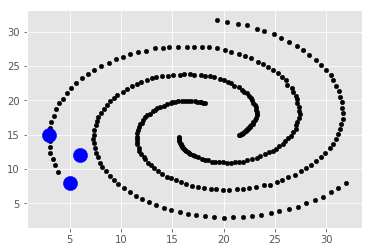

In [28]:
# Plot with the values of the random assigned centroids
plt.scatter(Column_one, Column_two,s=20, c='#030303')
plt.scatter(XCoord_Centroids, YCoord_Centroids,c='b', s=200, marker='o')

In [29]:
#Computing the distance between the converged centroids and the intially assigned centroids
Old_Centroids = np.zeros(Centroid.shape)
clusters = np.zeros(len(Coordinates))
error = dist(Centroid, Old_Centroids, None)

In [30]:
#This loop will run until the error will converge to 0
while error !=0:
    for i in range(len(Coordinates)):
        distances = dist(Coordinates[i], Centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Old_Centroids = deepcopy(Centroid)
    for i in range(k):
        points = [Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i]
        Centroid[i] = np.mean(points, axis=0)
    error = dist(Centroid, Old_Centroids, None)

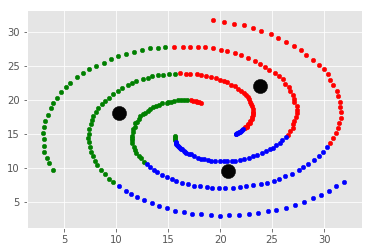

In [31]:
#Extra Credit Clustering Results


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, marker='o',c=colors[i])
ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='o', s=200, c='#040404')

In [32]:
# 2.b Computing the Sum of Squared Error and the Rand Index
#Computation of Sum of Squared Error
Sum_of_Squared_Error = 0
import math
for i in range(k):
   point_value = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
   for j in range(len(point_value)):
     val_p= (Centroid[i][0]-point_value[j][0])
     val_q= (Centroid[i][1]-point_value[j][1])
     val_p = math.pow(val_p,2)
     val_q = math.pow(val_q,2)
     final_val = val_q+val_p
     Sum_of_Squared_Error = Sum_of_Squared_Error + final_val
print("Sum_of_Squared_Error_2:",Sum_of_Squared_Error/100)

Sum_of_Squared_Error_2: 123.13275106261777


In [33]:
true_val = data['Cluster'].values

In [34]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [35]:
Rand_Index = rand_score(true_val,clusters)
print("The obtained Rand Index_2 is:",Rand_Index)

The obtained Rand Index_2 is: 0.5542913677961909


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


#RUN 3 of K Means Clustering Algorithm 

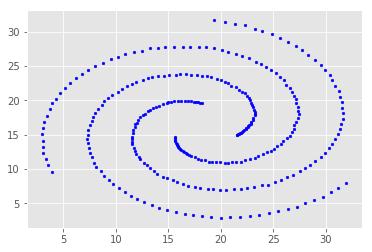

In [36]:
# 2.a Randomly initializing three centroids
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
# Getting the values and plotting it
Column_one = data['X_coordinate'].values
Column_two = data['Y_coordinate'].values
Coordinates = np.array(list(zip(Column_one, Column_two)))
plt.scatter(Column_one, Column_two,c='blue', s=7)

In [37]:
Coordinates

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [42]:
k = 3
def dist(first_point, second_point, ax=1):
    return np.linalg.norm(first_point - second_point, axis=ax)
XCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
YCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
Centroid = np.array(list(zip(XCoord_Centroids, YCoord_Centroids)), dtype=np.float32)
print(Centroid)

[[12. 13.]
 [13. 11.]
 [13.  5.]]


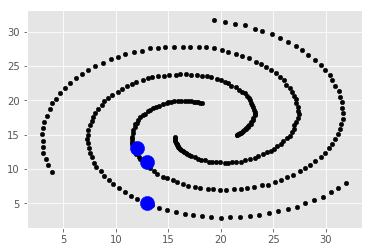

In [43]:
# Plot with the values of the random assigned centroids
plt.scatter(Column_one, Column_two,s=20, c='#030303')
plt.scatter(XCoord_Centroids, YCoord_Centroids,c='b', s=200, marker='o')

In [44]:
#Computing the distance between the converged centroids and the intially assigned centroids
Old_Centroids = np.zeros(Centroid.shape)
clusters = np.zeros(len(Coordinates))
error = dist(Centroid, Old_Centroids, None)

In [45]:
#This loop will run until the error will converge to 0
while error !=0:
    for i in range(len(Coordinates)):
        distances = dist(Coordinates[i], Centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Old_Centroids = deepcopy(Centroid)
    for i in range(k):
        points = [Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i]
        Centroid[i] = np.mean(points, axis=0)
    error = dist(Centroid, Old_Centroids, None)

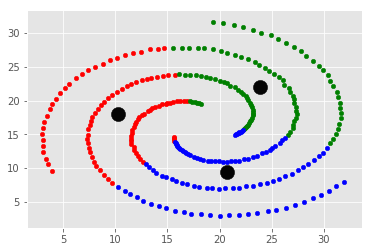

In [46]:
#Extra Credit Clustering Results


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, marker='o',c=colors[i])
ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='o', s=200, c='#040404')

In [48]:
# 2.b Computing the Sum of Squared Error and the Rand Index
#Computation of Sum of Squared Error
Sum_of_Squared_Error = 0
import math
for i in range(k):
   point_value = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
   for j in range(len(point_value)):
     val_p= (Centroid[i][0]-point_value[j][0])
     val_q= (Centroid[i][1]-point_value[j][1])
     val_p = math.pow(val_p,2)
     val_q = math.pow(val_q,2)
     final_val = val_q+val_p
     Sum_of_Squared_Error = Sum_of_Squared_Error + final_val
print("Sum_of_Squared_Error_3:",Sum_of_Squared_Error/100)

Sum_of_Squared_Error_3: 123.13275106261783


In [49]:
true_val = data['Cluster'].values

In [50]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [51]:
Rand_Index = rand_score(true_val,clusters)
print("The obtained Rand Index_3 is:",Rand_Index)

The obtained Rand Index_3 is: 0.5542913677961909


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


#RUN 4 of K Means Clustering Algorithm 

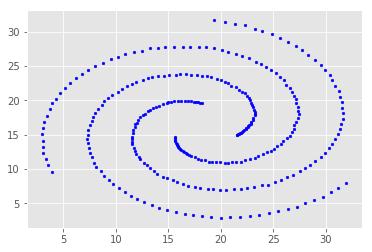

In [52]:
# 2.a Randomly initializing three centroids
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
# Getting the values and plotting it
Column_one = data['X_coordinate'].values
Column_two = data['Y_coordinate'].values
Coordinates = np.array(list(zip(Column_one, Column_two)))
plt.scatter(Column_one, Column_two,c='blue', s=7)

In [53]:
Coordinates

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [58]:
k = 3
def dist(first_point, second_point, ax=1):
    return np.linalg.norm(first_point - second_point, axis=ax)
XCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
YCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
Centroid = np.array(list(zip(XCoord_Centroids, YCoord_Centroids)), dtype=np.float32)
print(Centroid)

[[ 8. 15.]
 [ 8. 14.]
 [ 2.  8.]]


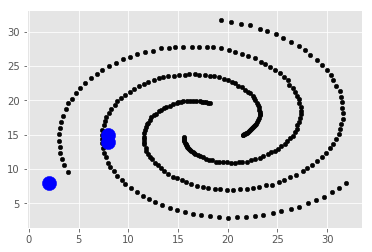

In [59]:
# Plot with the values of the random assigned centroids
plt.scatter(Column_one, Column_two,s=20, c='#030303')
plt.scatter(XCoord_Centroids, YCoord_Centroids,c='b', s=200, marker='o')

In [60]:
#Computing the distance between the converged centroids and the intially assigned centroids
Old_Centroids = np.zeros(Centroid.shape)
clusters = np.zeros(len(Coordinates))
error = dist(Centroid, Old_Centroids, None)

In [61]:
#This loop will run until the error will converge to 0
while error !=0:
    for i in range(len(Coordinates)):
        distances = dist(Coordinates[i], Centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Old_Centroids = deepcopy(Centroid)
    for i in range(k):
        points = [Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i]
        Centroid[i] = np.mean(points, axis=0)
    error = dist(Centroid, Old_Centroids, None)

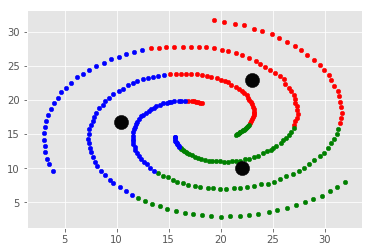

In [62]:
#Extra Credit Clustering Results


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, marker='o',c=colors[i])
ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='o', s=200, c='#040404')

In [63]:
# 2.b Computing the Sum of Squared Error and the Rand Index
#Computation of Sum of Squared Error
Sum_of_Squared_Error = 0
import math
for i in range(k):
   point_value = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
   for j in range(len(point_value)):
     val_p= (Centroid[i][0]-point_value[j][0])
     val_q= (Centroid[i][1]-point_value[j][1])
     val_p = math.pow(val_p,2)
     val_q = math.pow(val_q,2)
     final_val = val_q+val_p
     Sum_of_Squared_Error = Sum_of_Squared_Error + final_val
print("Sum_of_Squared_Error_4:",Sum_of_Squared_Error/100)

Sum_of_Squared_Error_4: 122.89186981270554


In [64]:
true_val = data['Cluster'].values

In [65]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [66]:
Rand_Index = rand_score(true_val,clusters)
print("The obtained Rand Index_4 is:",Rand_Index)

The obtained Rand Index_4 is: 0.5540028031989447


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


#RUN 5 of K Means Clustering Algorithm

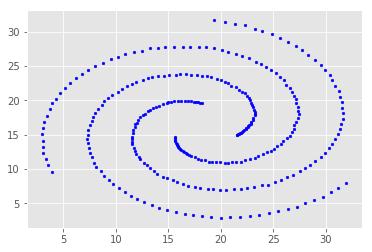

In [67]:
# 2.a Randomly initializing three centroids
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
# Getting the values and plotting it
Column_one = data['X_coordinate'].values
Column_two = data['Y_coordinate'].values
Coordinates = np.array(list(zip(Column_one, Column_two)))
plt.scatter(Column_one, Column_two,c='blue', s=7)

In [68]:
Coordinates

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [77]:
k = 3
def dist(first_point, second_point, ax=1):
    return np.linalg.norm(first_point - second_point, axis=ax)
XCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
YCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
Centroid = np.array(list(zip(XCoord_Centroids, YCoord_Centroids)), dtype=np.float32)
print(Centroid)

[[15.  6.]
 [13. 13.]
 [14.  9.]]


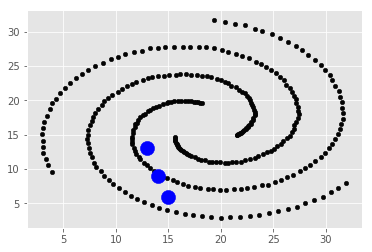

In [78]:
# Plot with the values of the random assigned centroids
plt.scatter(Column_one, Column_two,s=20, c='#030303')
plt.scatter(XCoord_Centroids, YCoord_Centroids,c='b', s=200, marker='o')

In [79]:
#Computing the distance between the converged centroids and the intially assigned centroids
Old_Centroids = np.zeros(Centroid.shape)
clusters = np.zeros(len(Coordinates))
error = dist(Centroid, Old_Centroids, None)

In [80]:
#This loop will run until the error will converge to 0
while error !=0:
    for i in range(len(Coordinates)):
        distances = dist(Coordinates[i], Centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Old_Centroids = deepcopy(Centroid)
    for i in range(k):
        points = [Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i]
        Centroid[i] = np.mean(points, axis=0)
    error = dist(Centroid, Old_Centroids, None)

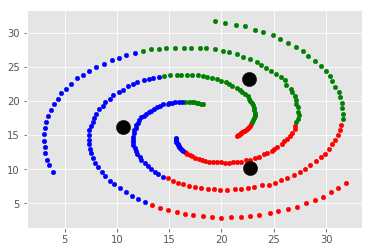

In [81]:
#Extra Credit Clustering Results


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, marker='o',c=colors[i])
ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='o', s=200, c='#040404')

In [82]:
# 2.b Computing the Sum of Squared Error and the Rand Index
#Computation of Sum of Squared Error
Sum_of_Squared_Error = 0
import math
for i in range(k):
   point_value = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
   for j in range(len(point_value)):
     val_p= (Centroid[i][0]-point_value[j][0])
     val_q= (Centroid[i][1]-point_value[j][1])
     val_p = math.pow(val_p,2)
     val_q = math.pow(val_q,2)
     final_val = val_q+val_p
     Sum_of_Squared_Error = Sum_of_Squared_Error + final_val
print("Sum_of_Squared_Error_5:",Sum_of_Squared_Error/100)

Sum_of_Squared_Error_5: 123.13900175402878


In [83]:
true_val = data['Cluster'].values

In [84]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [85]:
Rand_Index = rand_score(true_val,clusters)
print("The obtained Rand Index_5 is:",Rand_Index)

The obtained Rand Index_5 is: 0.554044026712837


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


#RUN 6 of K Means Clustering Algorithm

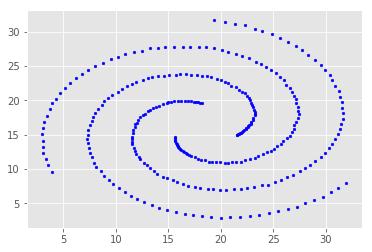

In [86]:
# 2.a Randomly initializing three centroids
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
# Getting the values and plotting it
Column_one = data['X_coordinate'].values
Column_two = data['Y_coordinate'].values
Coordinates = np.array(list(zip(Column_one, Column_two)))
plt.scatter(Column_one, Column_two,c='blue', s=7)

In [87]:
Coordinates

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [88]:
k = 3
def dist(first_point, second_point, ax=1):
    return np.linalg.norm(first_point - second_point, axis=ax)
XCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
YCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
Centroid = np.array(list(zip(XCoord_Centroids, YCoord_Centroids)), dtype=np.float32)
print(Centroid)

[[10.  7.]
 [ 1. 15.]
 [ 5. 12.]]


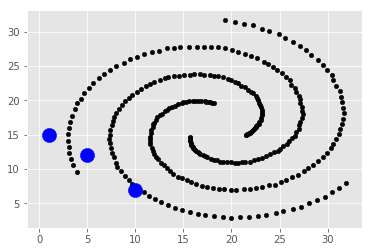

In [89]:
# Plot with the values of the random assigned centroids
plt.scatter(Column_one, Column_two,s=20, c='#030303')
plt.scatter(XCoord_Centroids, YCoord_Centroids,c='b', s=200, marker='o')

In [90]:
#Computing the distance between the converged centroids and the intially assigned centroids
Old_Centroids = np.zeros(Centroid.shape)
clusters = np.zeros(len(Coordinates))
error = dist(Centroid, Old_Centroids, None)

In [91]:
#This loop will run until the error will converge to 0
while error !=0:
    for i in range(len(Coordinates)):
        distances = dist(Coordinates[i], Centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Old_Centroids = deepcopy(Centroid)
    for i in range(k):
        points = [Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i]
        Centroid[i] = np.mean(points, axis=0)
    error = dist(Centroid, Old_Centroids, None)

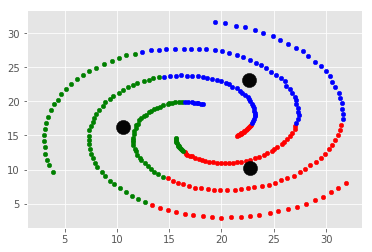

In [92]:
#Extra Credit Clustering Results


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, marker='o',c=colors[i])
ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='o', s=200, c='#040404')

In [93]:
# 2.b Computing the Sum of Squared Error and the Rand Index
#Computation of Sum of Squared Error
Sum_of_Squared_Error = 0
import math
for i in range(k):
   point_value = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
   for j in range(len(point_value)):
     val_p= (Centroid[i][0]-point_value[j][0])
     val_q= (Centroid[i][1]-point_value[j][1])
     val_p = math.pow(val_p,2)
     val_q = math.pow(val_q,2)
     final_val = val_q+val_p
     Sum_of_Squared_Error = Sum_of_Squared_Error + final_val
print("Sum_of_Squared_Error_6:",Sum_of_Squared_Error/100)

Sum_of_Squared_Error_6: 123.1390017540288


In [94]:
true_val = data['Cluster'].values

In [95]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [97]:
Rand_Index = rand_score(true_val,clusters)
print("The obtained Rand Index_6 is:",Rand_Index)

The obtained Rand Index_6 is: 0.554044026712837


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


#RUN 7 of K Means Clustering Algorithm

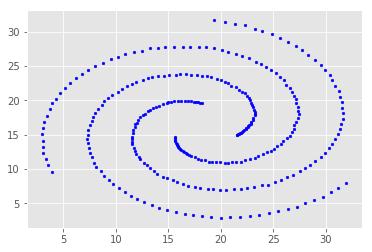

In [98]:
# 2.a Randomly initializing three centroids
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
# Getting the values and plotting it
Column_one = data['X_coordinate'].values
Column_two = data['Y_coordinate'].values
Coordinates = np.array(list(zip(Column_one, Column_two)))
plt.scatter(Column_one, Column_two,c='blue', s=7)

In [99]:
Coordinates

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [112]:
k = 3
def dist(first_point, second_point, ax=1):
    return np.linalg.norm(first_point - second_point, axis=ax)
XCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
YCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
Centroid = np.array(list(zip(XCoord_Centroids, YCoord_Centroids)), dtype=np.float32)
print(Centroid)

[[ 9.  6.]
 [ 7. 15.]
 [ 9. 12.]]


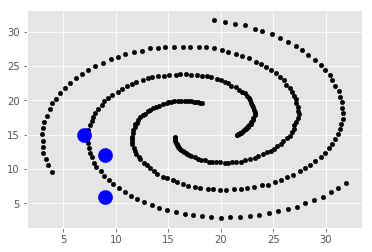

In [113]:
# Plot with the values of the random assigned centroids
plt.scatter(Column_one, Column_two,s=20, c='#030303')
plt.scatter(XCoord_Centroids, YCoord_Centroids,c='b', s=200, marker='o')

In [114]:
#Computing the distance between the converged centroids and the intially assigned centroids
Old_Centroids = np.zeros(Centroid.shape)
clusters = np.zeros(len(Coordinates))
error = dist(Centroid, Old_Centroids, None)

In [115]:
#This loop will run until the error will converge to 0
while error !=0:
    for i in range(len(Coordinates)):
        distances = dist(Coordinates[i], Centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Old_Centroids = deepcopy(Centroid)
    for i in range(k):
        points = [Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i]
        Centroid[i] = np.mean(points, axis=0)
    error = dist(Centroid, Old_Centroids, None)

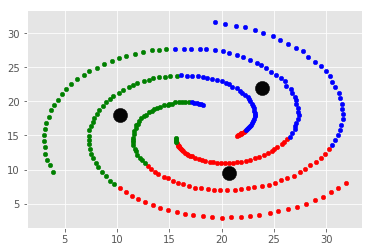

In [116]:
#Extra Credit Clustering Results


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, marker='o',c=colors[i])
ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='o', s=200, c='#040404')

In [117]:
# 2.b Computing the Sum of Squared Error and the Rand Index
#Computation of Sum of Squared Error
Sum_of_Squared_Error = 0
import math
for i in range(k):
   point_value = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
   for j in range(len(point_value)):
     val_p= (Centroid[i][0]-point_value[j][0])
     val_q= (Centroid[i][1]-point_value[j][1])
     val_p = math.pow(val_p,2)
     val_q = math.pow(val_q,2)
     final_val = val_q+val_p
     Sum_of_Squared_Error = Sum_of_Squared_Error + final_val
print("Sum_of_Squared_Error_7:",Sum_of_Squared_Error/100)

Sum_of_Squared_Error_7: 123.13275106261776


In [118]:
true_val = data['Cluster'].values

In [119]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [120]:
Rand_Index = rand_score(true_val,clusters)
print("The obtained Rand Index_7 is:",Rand_Index)

The obtained Rand Index_7 is: 0.5542913677961909


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


#RUN 8 of K Means Clustering Algorithm

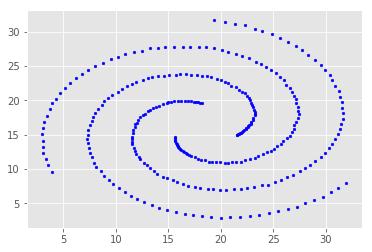

In [121]:
# 2.a Randomly initializing three centroids
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
# Getting the values and plotting it
Column_one = data['X_coordinate'].values
Column_two = data['Y_coordinate'].values
Coordinates = np.array(list(zip(Column_one, Column_two)))
plt.scatter(Column_one, Column_two,c='blue', s=7)

In [122]:
Coordinates

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [123]:
k = 3
def dist(first_point, second_point, ax=1):
    return np.linalg.norm(first_point - second_point, axis=ax)
XCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
YCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
Centroid = np.array(list(zip(XCoord_Centroids, YCoord_Centroids)), dtype=np.float32)
print(Centroid)

[[ 9.  3.]
 [ 4.  7.]
 [ 9. 15.]]


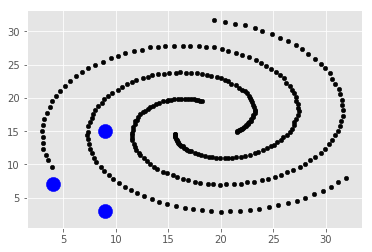

In [124]:
# Plot with the values of the random assigned centroids
plt.scatter(Column_one, Column_two,s=20, c='#030303')
plt.scatter(XCoord_Centroids, YCoord_Centroids,c='b', s=200, marker='o')

In [125]:
#Computing the distance between the converged centroids and the intially assigned centroids
Old_Centroids = np.zeros(Centroid.shape)
clusters = np.zeros(len(Coordinates))
error = dist(Centroid, Old_Centroids, None)

In [126]:
#This loop will run until the error will converge to 0
while error !=0:
    for i in range(len(Coordinates)):
        distances = dist(Coordinates[i], Centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Old_Centroids = deepcopy(Centroid)
    for i in range(k):
        points = [Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i]
        Centroid[i] = np.mean(points, axis=0)
    error = dist(Centroid, Old_Centroids, None)

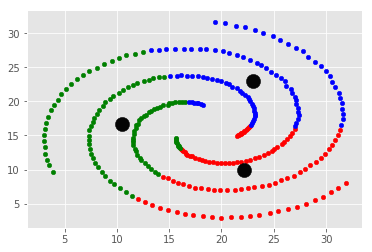

In [127]:
#Extra Credit Clustering Results


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, marker='o',c=colors[i])
ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='o', s=200, c='#040404')

In [128]:
# 2.b Computing the Sum of Squared Error and the Rand Index
#Computation of Sum of Squared Error
Sum_of_Squared_Error = 0
import math
for i in range(k):
   point_value = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
   for j in range(len(point_value)):
     val_p= (Centroid[i][0]-point_value[j][0])
     val_q= (Centroid[i][1]-point_value[j][1])
     val_p = math.pow(val_p,2)
     val_q = math.pow(val_q,2)
     final_val = val_q+val_p
     Sum_of_Squared_Error = Sum_of_Squared_Error + final_val
print("Sum_of_Squared_Error_8:",Sum_of_Squared_Error/100)

Sum_of_Squared_Error_8: 122.9034642012644


In [129]:
true_val = data['Cluster'].values

In [130]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [132]:
Rand_Index = rand_score(true_val,clusters)
print("The obtained Rand Index_8 is:",Rand_Index)

The obtained Rand Index_8 is: 0.5541264737406216


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


#RUN 9 of K Means Clustering Algorithm

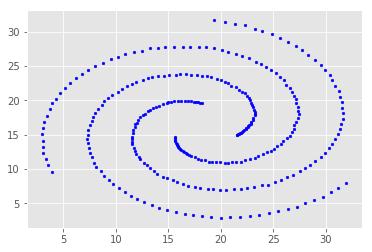

In [133]:
# 2.a Randomly initializing three centroids
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
# Getting the values and plotting it
Column_one = data['X_coordinate'].values
Column_two = data['Y_coordinate'].values
Coordinates = np.array(list(zip(Column_one, Column_two)))
plt.scatter(Column_one, Column_two,c='blue', s=7)

In [134]:
Coordinates

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [135]:
k = 3
def dist(first_point, second_point, ax=1):
    return np.linalg.norm(first_point - second_point, axis=ax)
XCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
YCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
Centroid = np.array(list(zip(XCoord_Centroids, YCoord_Centroids)), dtype=np.float32)
print(Centroid)

[[14.  3.]
 [ 0. 10.]
 [11. 12.]]


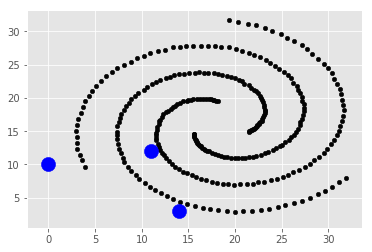

In [136]:
# Plot with the values of the random assigned centroids
plt.scatter(Column_one, Column_two,s=20, c='#030303')
plt.scatter(XCoord_Centroids, YCoord_Centroids,c='b', s=200, marker='o')

In [137]:
#Computing the distance between the converged centroids and the intially assigned centroids
Old_Centroids = np.zeros(Centroid.shape)
clusters = np.zeros(len(Coordinates))
error = dist(Centroid, Old_Centroids, None)

In [138]:
#This loop will run until the error will converge to 0
while error !=0:
    for i in range(len(Coordinates)):
        distances = dist(Coordinates[i], Centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Old_Centroids = deepcopy(Centroid)
    for i in range(k):
        points = [Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i]
        Centroid[i] = np.mean(points, axis=0)
    error = dist(Centroid, Old_Centroids, None)

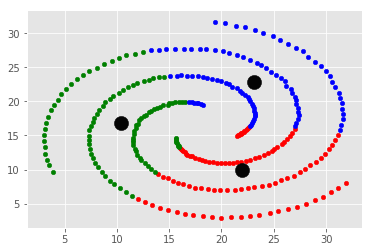

In [139]:
#Extra Credit Clustering Results


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, marker='o',c=colors[i])
ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='o', s=200, c='#040404')

In [140]:
# 2.b Computing the Sum of Squared Error and the Rand Index
#Computation of Sum of Squared Error
Sum_of_Squared_Error = 0
import math
for i in range(k):
   point_value = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
   for j in range(len(point_value)):
     val_p= (Centroid[i][0]-point_value[j][0])
     val_q= (Centroid[i][1]-point_value[j][1])
     val_p = math.pow(val_p,2)
     val_q = math.pow(val_q,2)
     final_val = val_q+val_p
     Sum_of_Squared_Error = Sum_of_Squared_Error + final_val
print("Sum_of_Squared_Error_9:",Sum_of_Squared_Error/100)

Sum_of_Squared_Error_9: 122.88014777236742


In [141]:
true_val = data['Cluster'].values

In [142]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [143]:
Rand_Index = rand_score(true_val,clusters)
print("The obtained Rand Index_9 is:",Rand_Index)

The obtained Rand Index_9 is: 0.5541264737406216


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


#RUN 10 of K Means Clustering Algorithm 

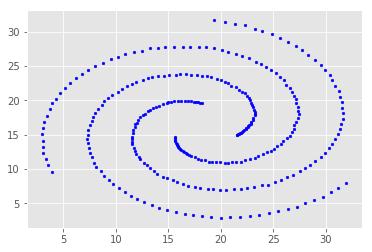

In [144]:
# 2.a Randomly initializing three centroids
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
# Getting the values and plotting it
Column_one = data['X_coordinate'].values
Column_two = data['Y_coordinate'].values
Coordinates = np.array(list(zip(Column_one, Column_two)))
plt.scatter(Column_one, Column_two,c='blue', s=7)

In [145]:
Coordinates

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [146]:
k = 3
def dist(first_point, second_point, ax=1):
    return np.linalg.norm(first_point - second_point, axis=ax)
XCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
YCoord_Centroids = np.random.randint(0, np.max(Coordinates)-15, size=k)
Centroid = np.array(list(zip(XCoord_Centroids, YCoord_Centroids)), dtype=np.float32)
print(Centroid)

[[ 6. 13.]
 [10.  7.]
 [10. 10.]]


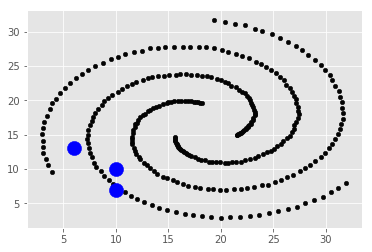

In [147]:
# Plot with the values of the random assigned centroids
plt.scatter(Column_one, Column_two,s=20, c='#030303')
plt.scatter(XCoord_Centroids, YCoord_Centroids,c='b', s=200, marker='o')

In [148]:
#Computing the distance between the converged centroids and the intially assigned centroids
Old_Centroids = np.zeros(Centroid.shape)
clusters = np.zeros(len(Coordinates))
error = dist(Centroid, Old_Centroids, None)

In [149]:
#This loop will run until the error will converge to 0
while error !=0:
    for i in range(len(Coordinates)):
        distances = dist(Coordinates[i], Centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Old_Centroids = deepcopy(Centroid)
    for i in range(k):
        points = [Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i]
        Centroid[i] = np.mean(points, axis=0)
    error = dist(Centroid, Old_Centroids, None)

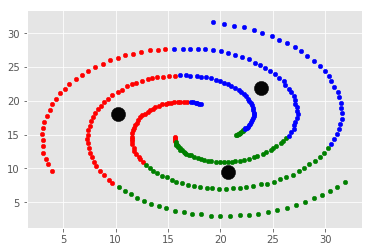

In [150]:
#Extra Credit Clustering Results


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, marker='o',c=colors[i])
ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='o', s=200, c='#040404')

In [151]:
# 2.b Computing the Sum of Squared Error and the Rand Index
#Computation of Sum of Squared Error
Sum_of_Squared_Error = 0
import math
for i in range(k):
   point_value = np.array([Coordinates[j] for j in range(len(Coordinates)) if clusters[j] == i])
   for j in range(len(point_value)):
     val_p= (Centroid[i][0]-point_value[j][0])
     val_q= (Centroid[i][1]-point_value[j][1])
     val_p = math.pow(val_p,2)
     val_q = math.pow(val_q,2)
     final_val = val_q+val_p
     Sum_of_Squared_Error = Sum_of_Squared_Error + final_val
print("Sum_of_Squared_Error_10:",Sum_of_Squared_Error/100)

Sum_of_Squared_Error_10: 123.13275106261781


In [152]:
true_val = data['Cluster'].values

In [153]:
#Computation of the Rand Index
from itertools import combinations
from scipy.misc import comb
def rand_score (true_value, pred_value):
    Pairs = list(combinations(range(len(true_value)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    p = 0
    q = 0
    for i in range(len(Pairs)):
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == True):
                p += 1
            if(is_equal((true_value[Pairs[i][0]],true_value[Pairs[i][1]])) == is_equal
               ((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) 
               and is_equal((pred_value[Pairs[i][0]],pred_value[Pairs[i][1]])) == False):
                q += 1
    Denominator = comb(len(true_value),2)
    Rand_Index = (p + q) / Denominator
    return Rand_Index

In [155]:
Rand_Index = rand_score(true_val,clusters)
print("The obtained Rand Index_10 is:",Rand_Index)

The obtained Rand Index_10 is: 0.5542913677961909


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


The Task 2.a and 2.b was repeated 9 more times and the best Sum of Squared Error and Rand index was found in the Run 8
with an Sum of Squared Error of 122.88014
and Rand Index of 0.55412
